# Load dữ liệu

# import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
 

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Drop các thuộc tính có nhiều giá trị null

In [3]:
col_drop_null = []
for col in train_data.columns:
    if train_data[col].isnull().sum() > 500:
        col_drop_null.append(col)
        train_data.drop(columns=[col], inplace=True)
# train_data   
col_drop_null

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

## Drop các cột có nhiều giá trị 0

In [4]:
def drop_zero_columns(df, threshold_ratio=0.5):
    """
    Drop những cột có số lượng giá trị = 0 vượt quá ngưỡng tỷ lệ threshold_ratio.
    Mặc định threshold_ratio = 0.5 nghĩa là > 50% là zero thì drop.
    """
    n_rows = len(df)
    cols_to_drop = []

    for col in df.columns:
        zero_count = (df[col] == 0).sum()
        if zero_count / n_rows > threshold_ratio:
            cols_to_drop.append(col)

    df.drop(columns=cols_to_drop, inplace=True)
    return cols_to_drop

dropped_columns = drop_zero_columns(train_data, threshold_ratio=0.5)
print(f"Dropped columns: {dropped_columns}")

train_data

Dropped columns: ['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,548,TA,TA,Y,61,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,608,TA,TA,Y,42,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,642,TA,TA,Y,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,836,TA,TA,Y,84,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,460,TA,TA,Y,40,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,500,TA,TA,Y,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,252,TA,TA,Y,60,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,240,TA,TA,Y,0,4,2010,WD,Normal,142125


## Lọc các cột có ảnh hưởng mạnh đến target

In [5]:
features_number = []
features_object = []
for col in train_data.columns:
    if train_data[col].dtype != 'object':
        features_number.append(col)
    else:
        features_object.append(col)

# train_data[features].corr()['SalePrice'].sort_values(ascending=False)

feature_engineered = []

for col in features_number:
    if abs(train_data[features_number].corr()['SalePrice'][col]) > 0.5:
        feature_engineered.append(col)
# print(f" cột số ảnh hưởng mạnh đến mục tiêu{feature_engineered}")
features_object


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

<Axes: >

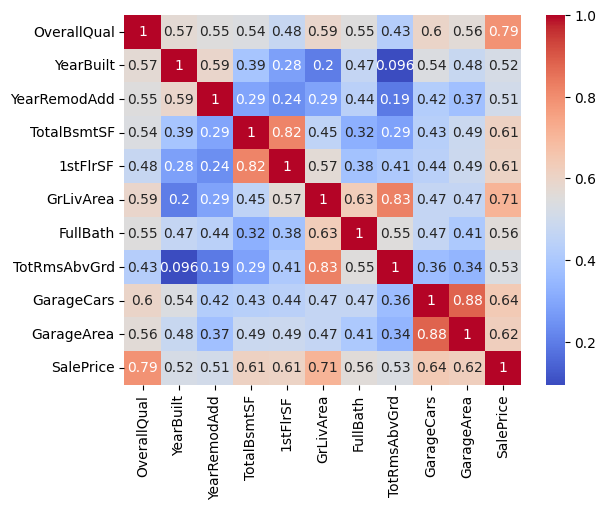

In [6]:
sns.heatmap(train_data[feature_engineered].corr(), annot=True, cmap='coolwarm')

## Tính tỉ lệ các giá trị trong mỗi cột

In [12]:
for col in features_object:
    print(f"--- {col} ---")
    counts = train_data[col].value_counts().head(5)
    percents = train_data[col].value_counts(normalize=True)
    print(pd.DataFrame({"count": counts, "percent": percents}))
    print("\n")


--- MSZoning ---
          count   percent
MSZoning                 
RL         1151  0.788356
RM          218  0.149315
FV           65  0.044521
RH           16  0.010959
C (all)      10  0.006849


--- Street ---
        count  percent
Street                
Pave     1454  0.99589
Grvl        6  0.00411


--- LotShape ---
          count   percent
LotShape                 
Reg         925  0.633562
IR1         484  0.331507
IR2          41  0.028082
IR3          10  0.006849


--- LandContour ---
             count   percent
LandContour                 
Lvl           1311  0.897945
Bnk             63  0.043151
HLS             50  0.034247
Low             36  0.024658


--- Utilities ---
           count   percent
Utilities                 
AllPub      1459  0.999315
NoSeWa         1  0.000685


--- LotConfig ---
           count   percent
LotConfig                 
Inside      1052  0.720548
Corner       263  0.180137
CulDSac       94  0.064384
FR2           47  0.032192
FR3        

## lưu các feature có kiểu object để xem đầy đủ các giá trị uni

In [9]:
for col in features_object:
    counts = train_data[col].value_counts().reset_index()
    counts.columns = [col, "count"]
    counts.to_csv(f"{col}.csv", index=False)


## chọn các feature có dữ liệu phân bố ít lệch

In [6]:
features_ob = ['BsmtExposure','BsmtFinType1','BsmtQual','Exterior1st','Exterior2nd','ExterQual','Foundation','GarageFinish','GarageType','HeatingQC','HouseStyle','KitchenQual','LandSlope','LotConfig','LotShape','MSZoning','Neighborhood','RoofStyle','SaleCondition','YrSold']
features =   feature_engineered + features_ob

train_X = train_data[features]

features_no_target = [c for c in features if c != 'SalePrice']
test_X = test_data[features_no_target]

In [7]:
features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtQual',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'GarageFinish',
 'GarageType',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'Neighborhood',
 'RoofStyle',
 'SaleCondition',
 'YrSold']

## biểu đồ tương quan giữa các feature với target

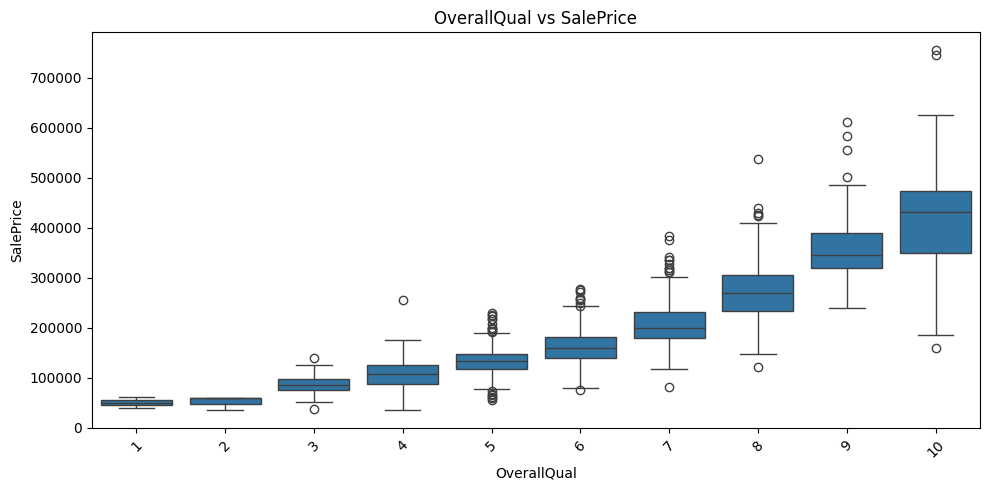

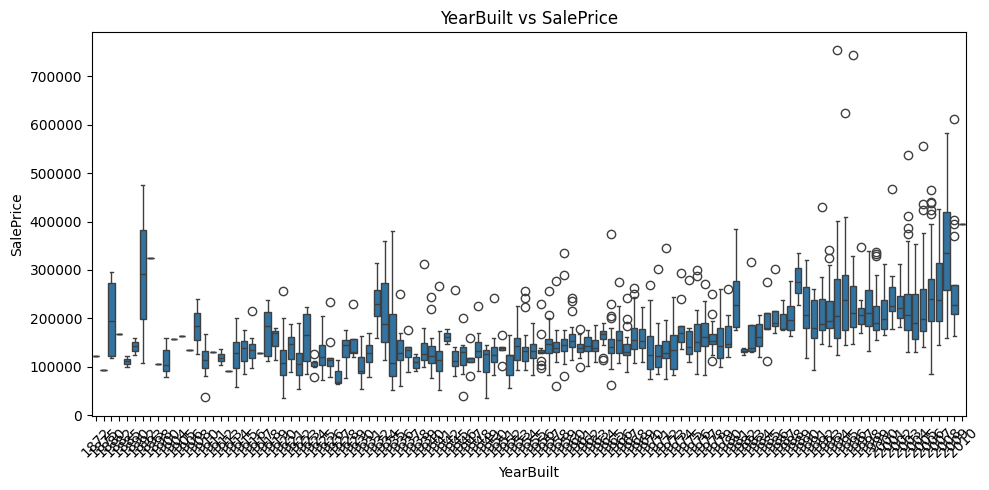

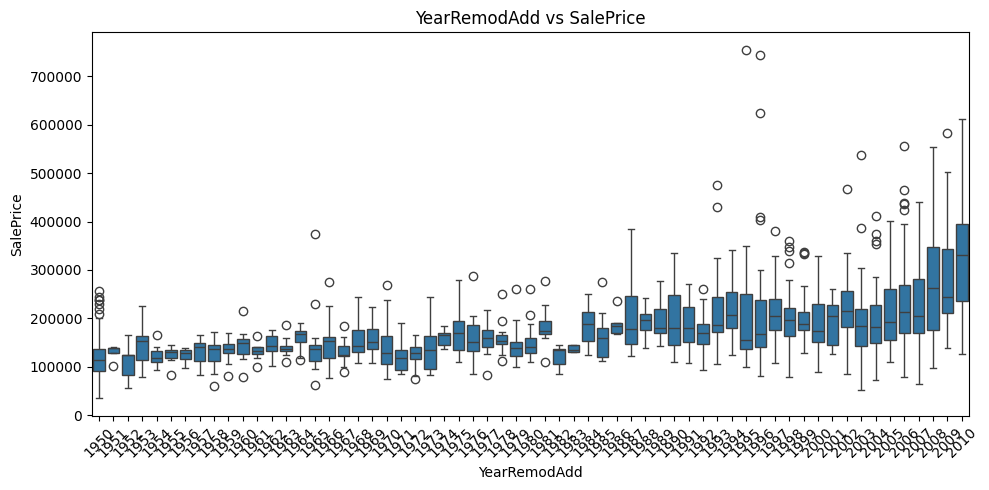

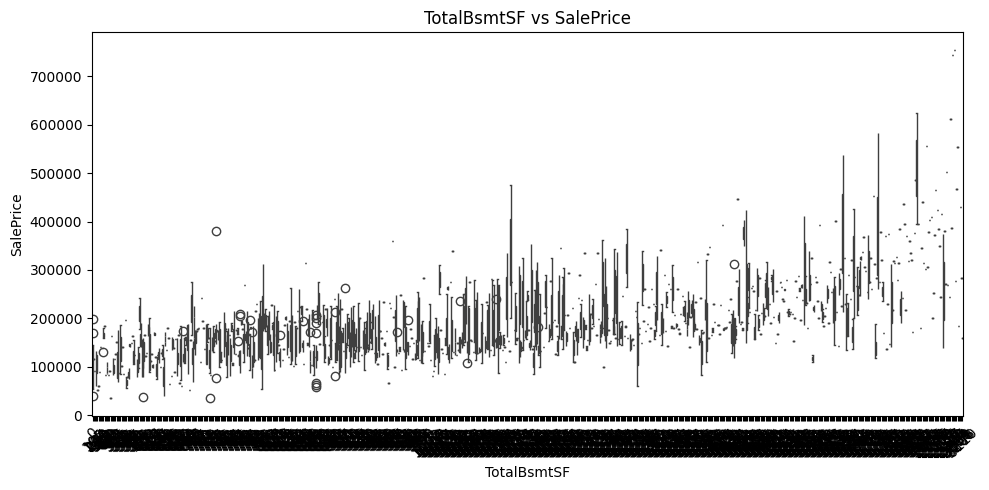

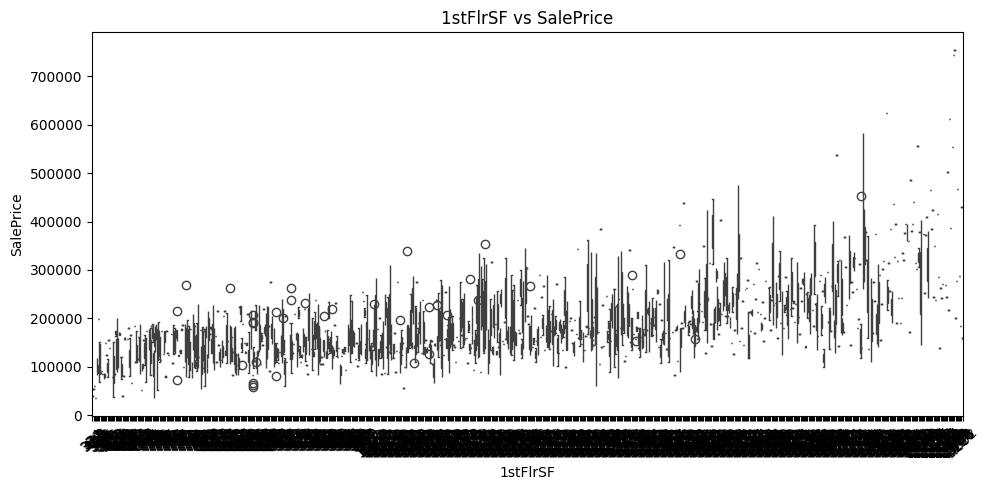

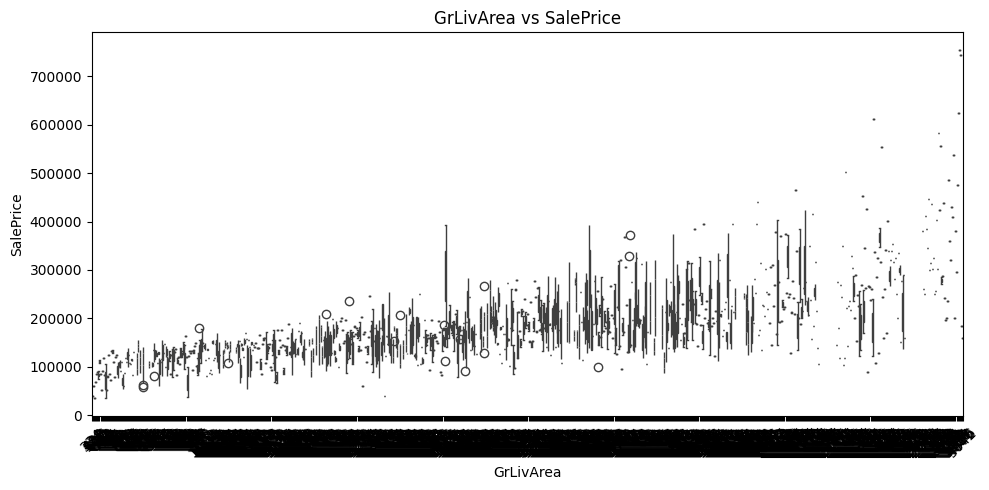

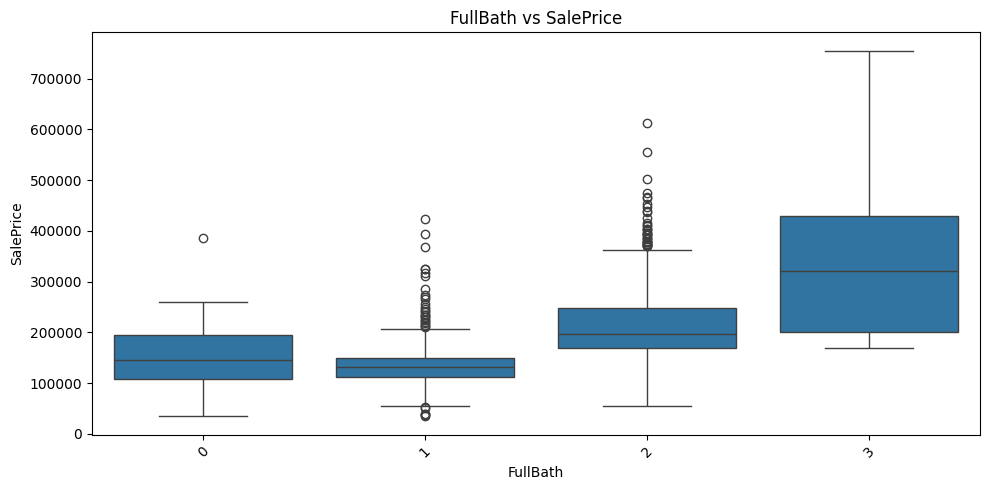

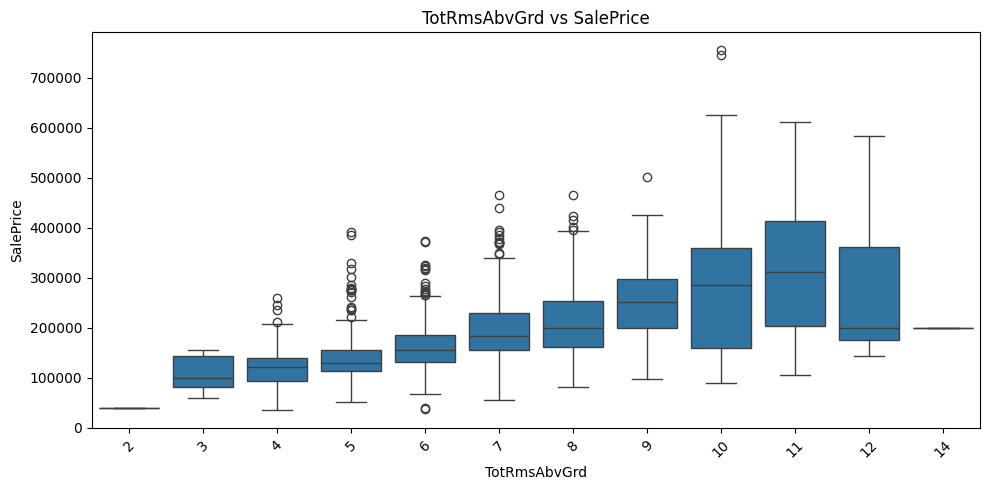

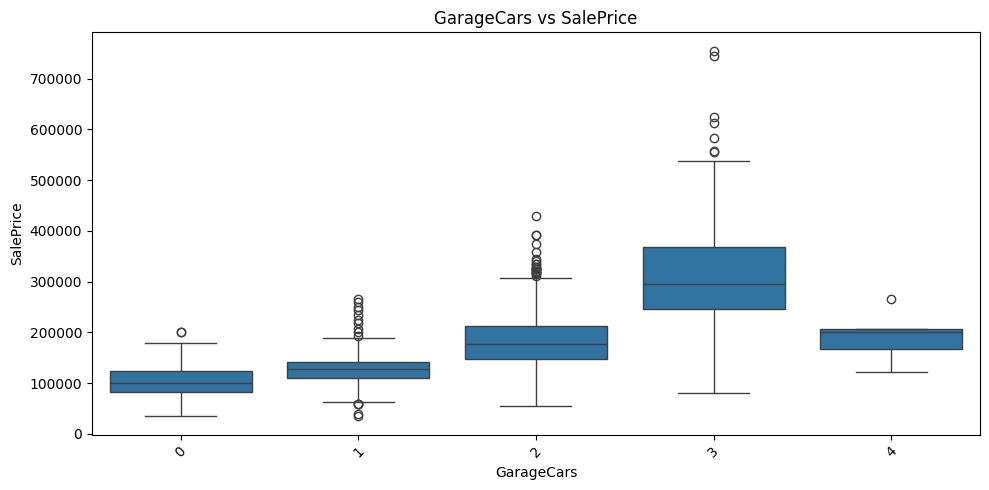

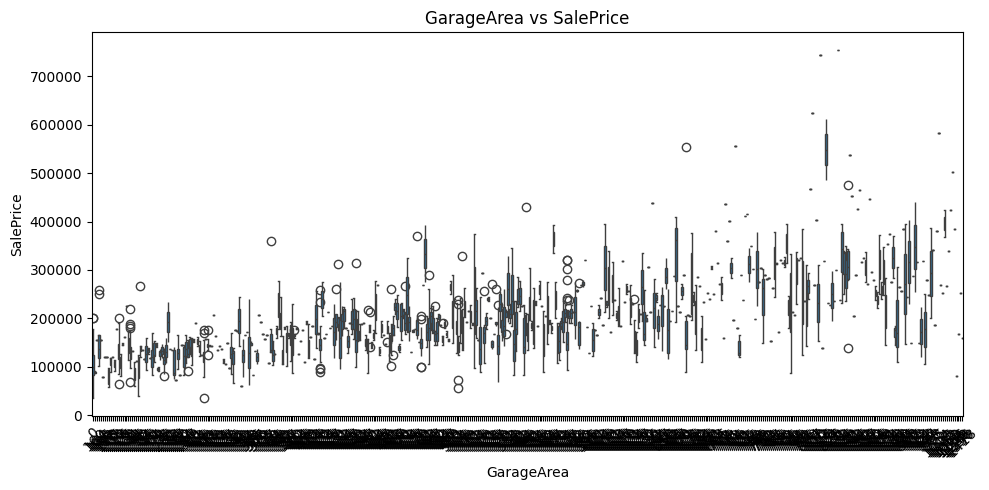

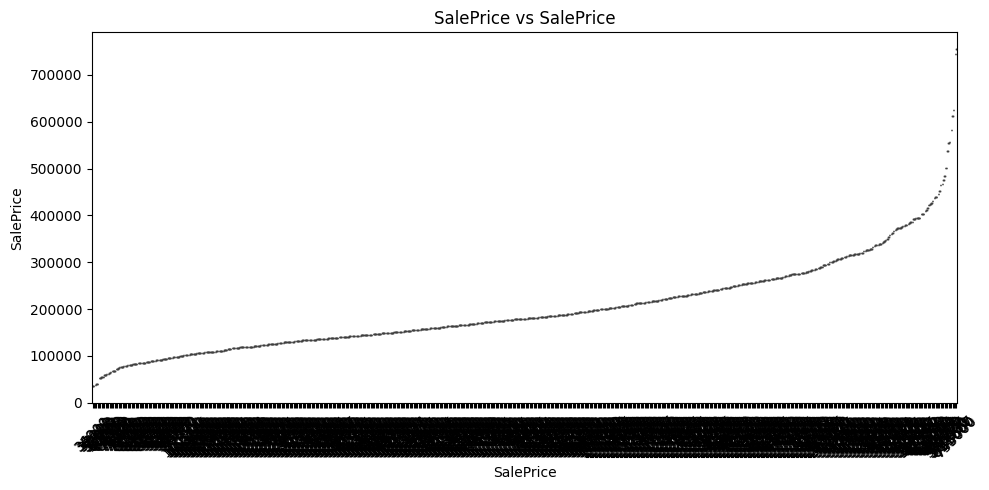

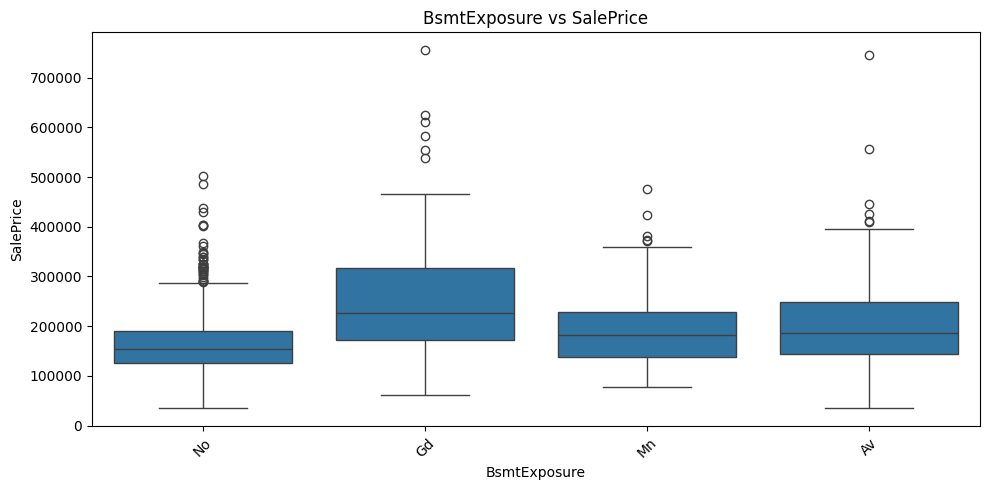

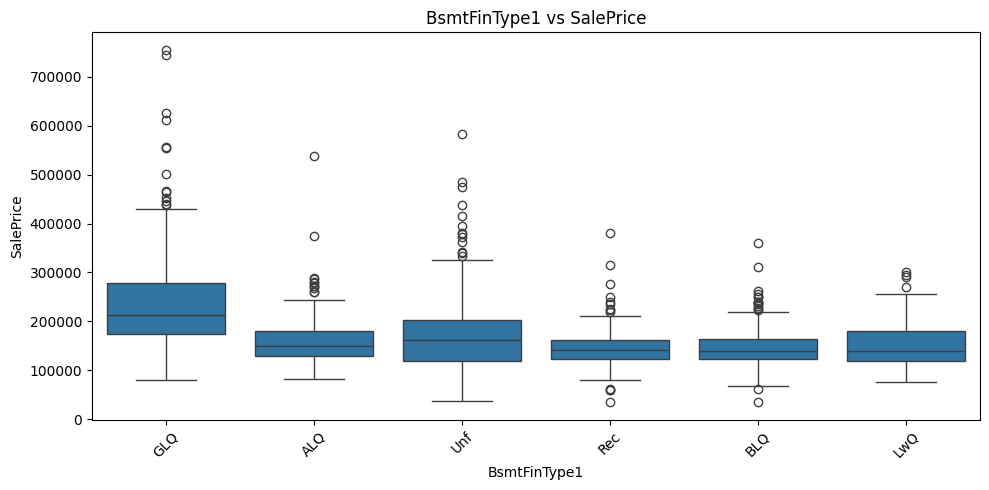

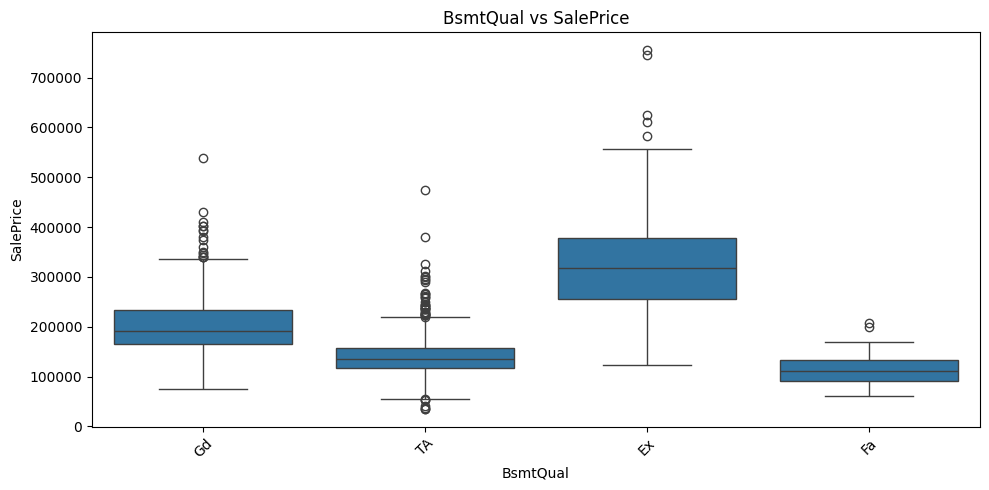

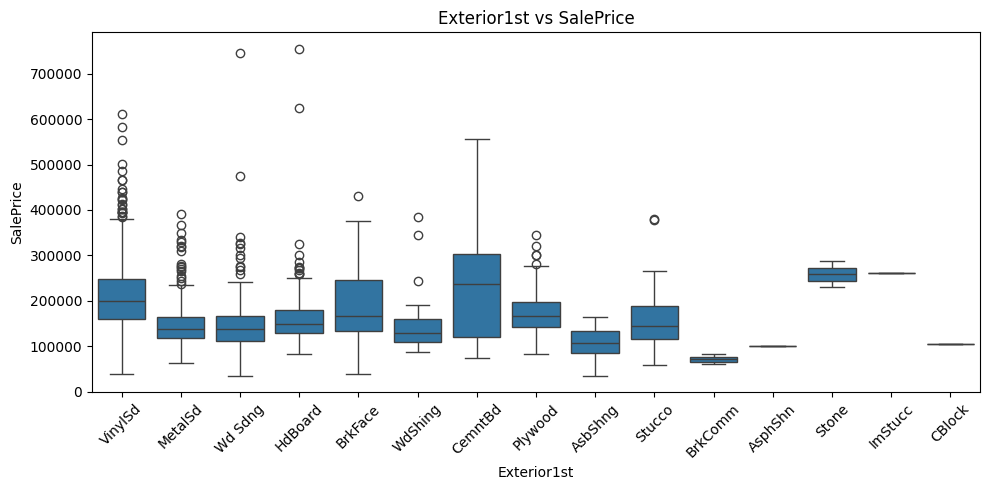

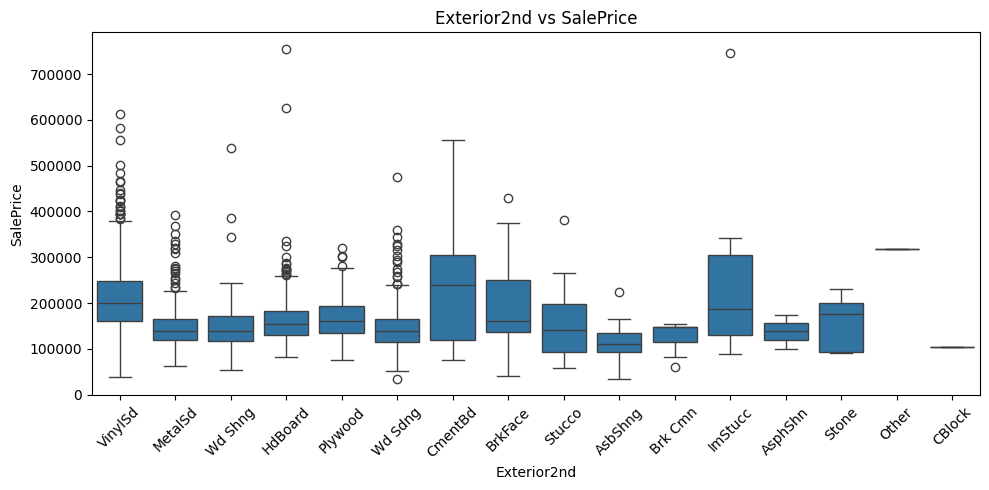

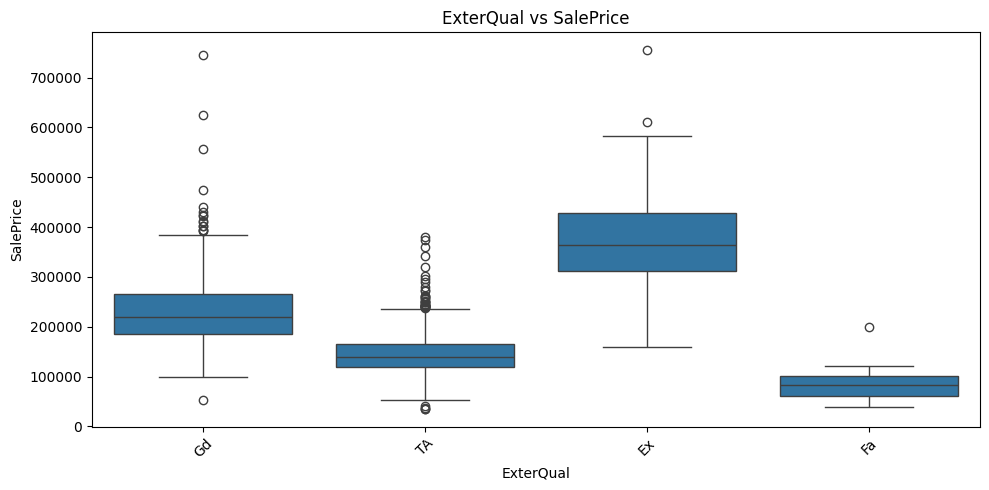

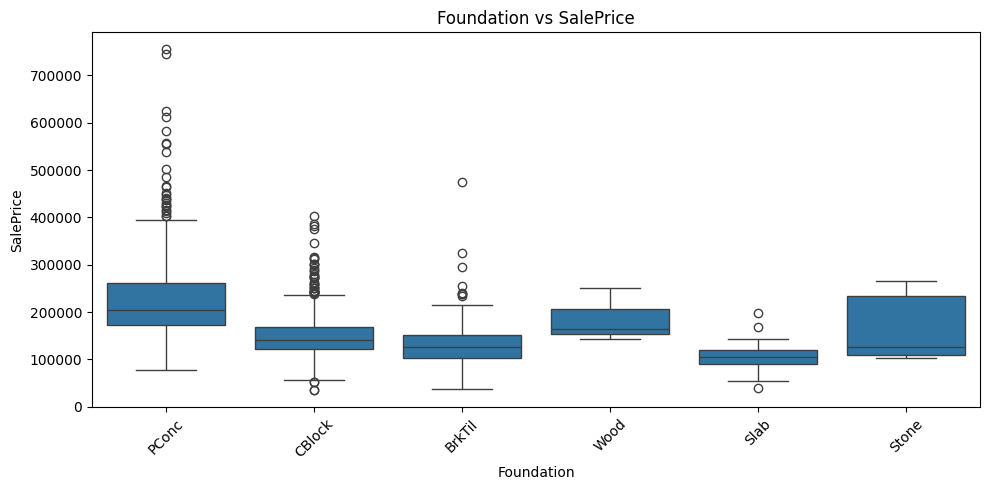

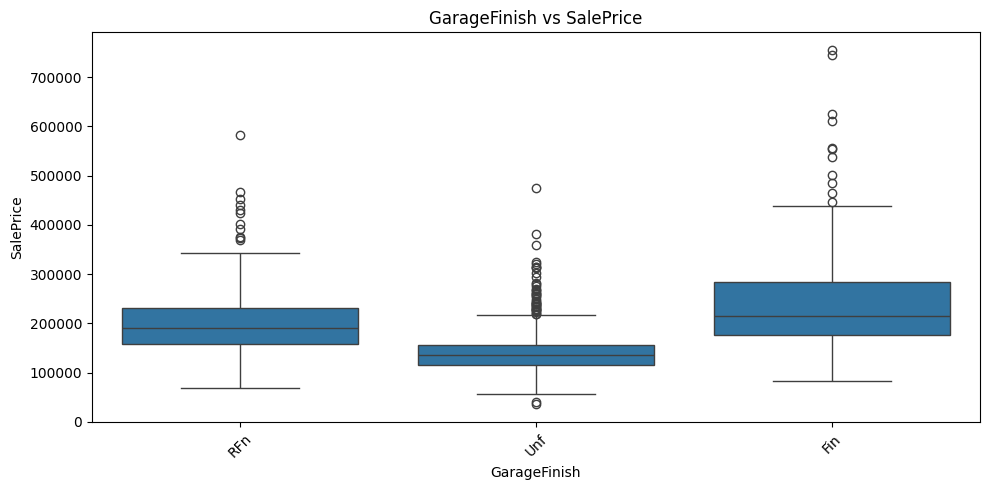

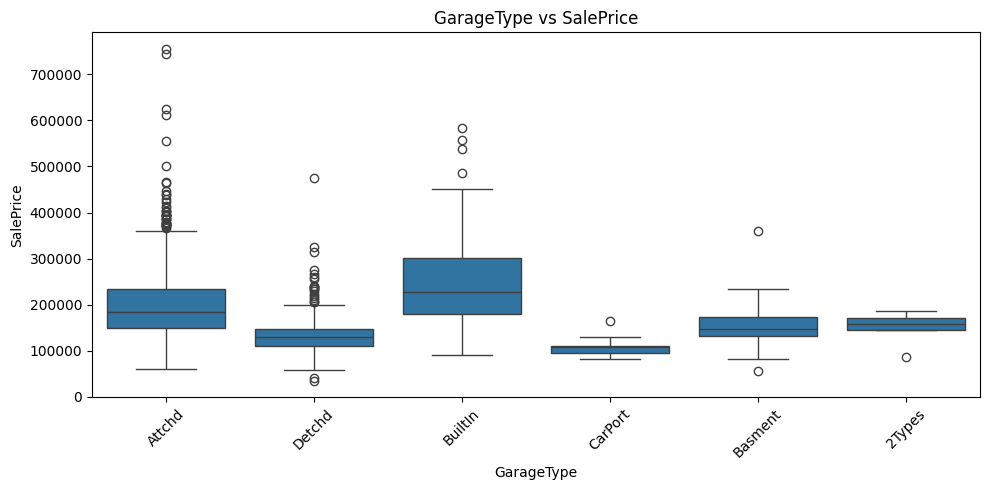

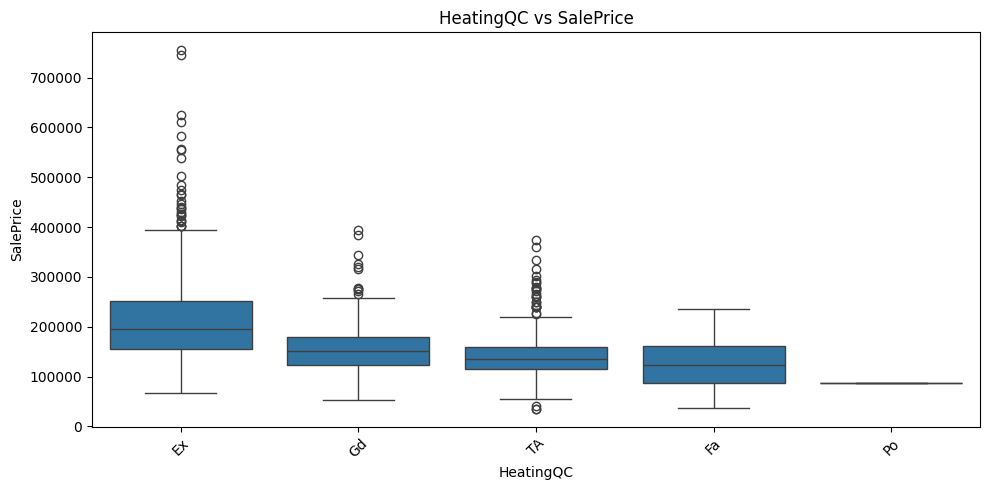

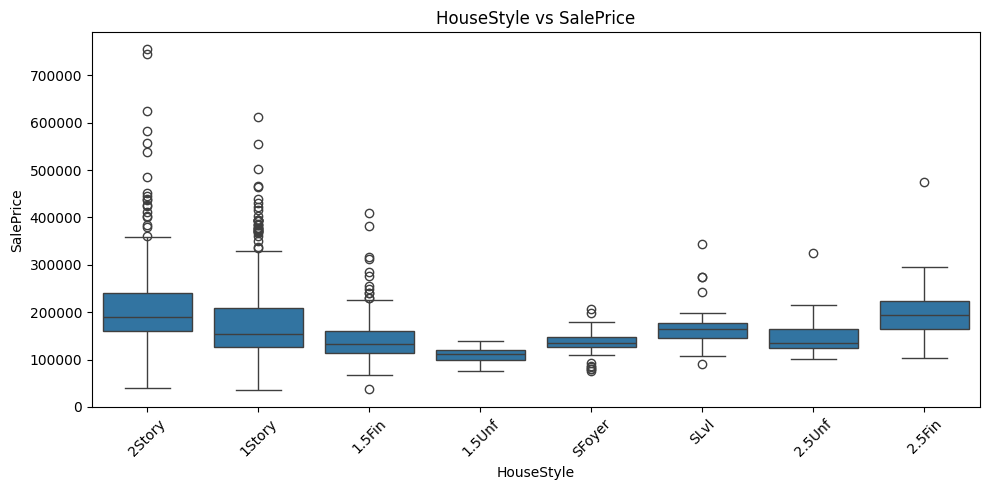

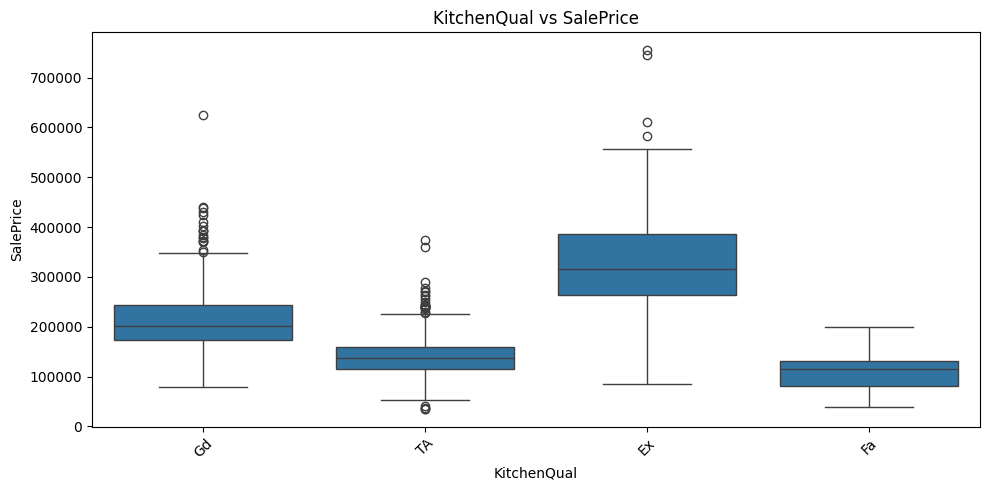

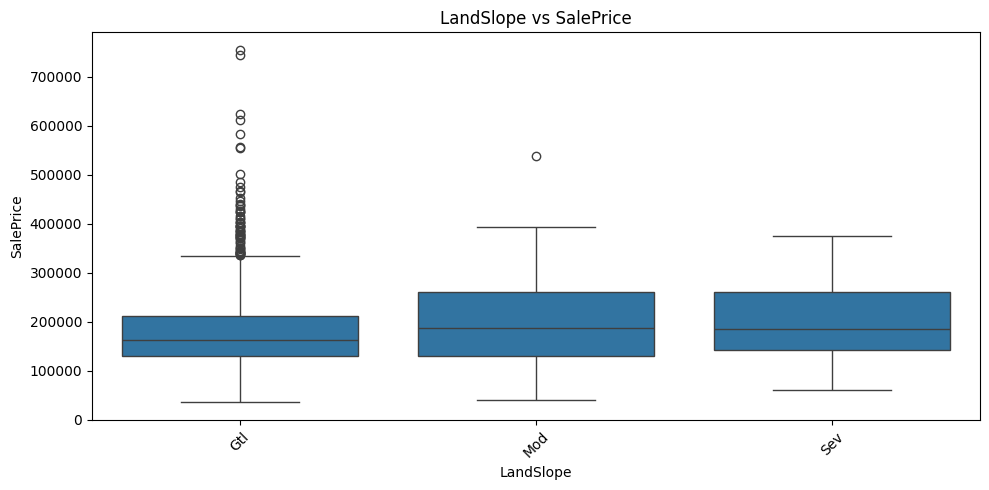

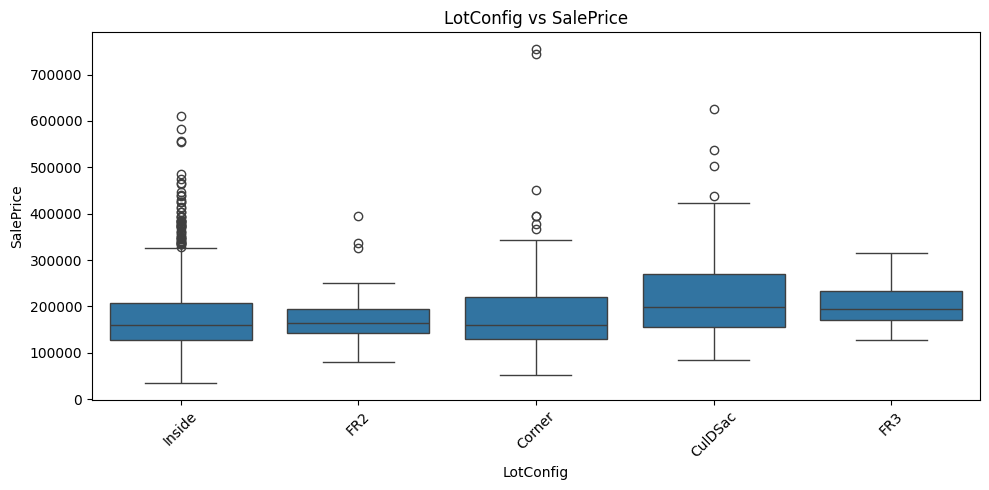

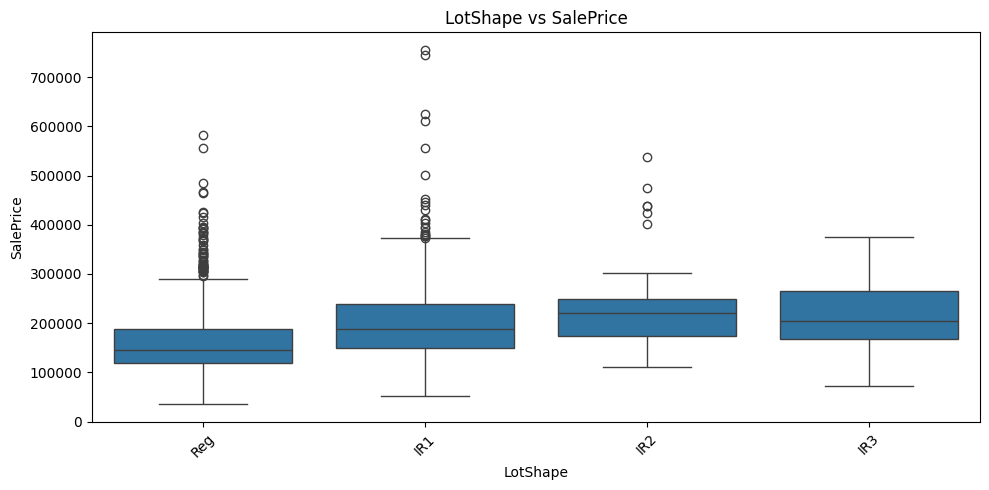

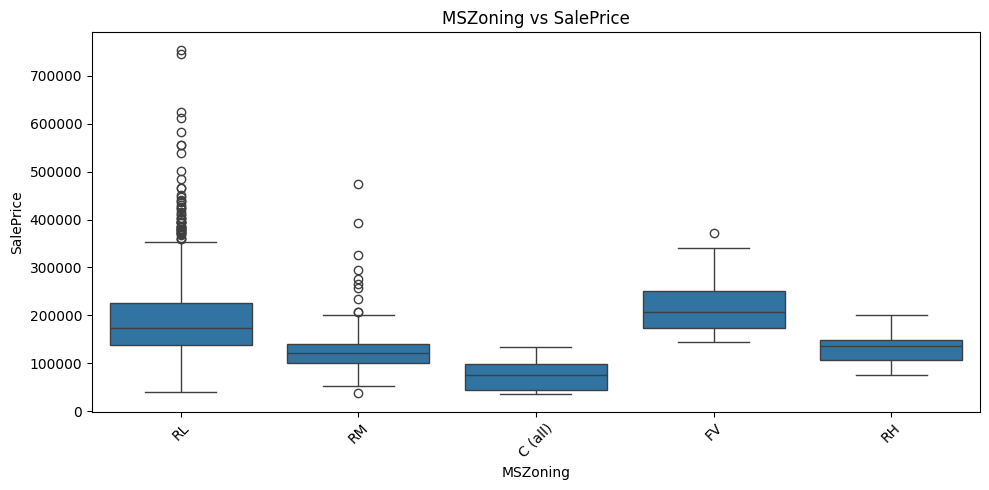

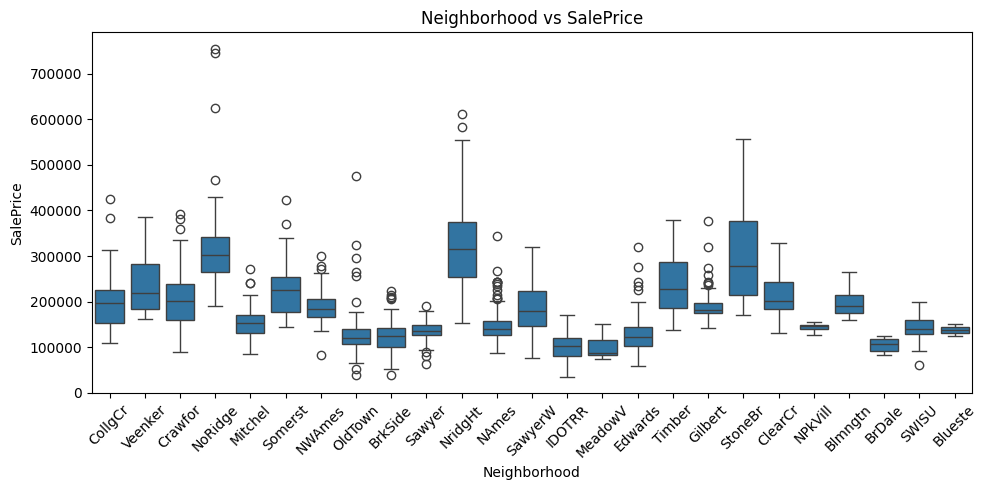

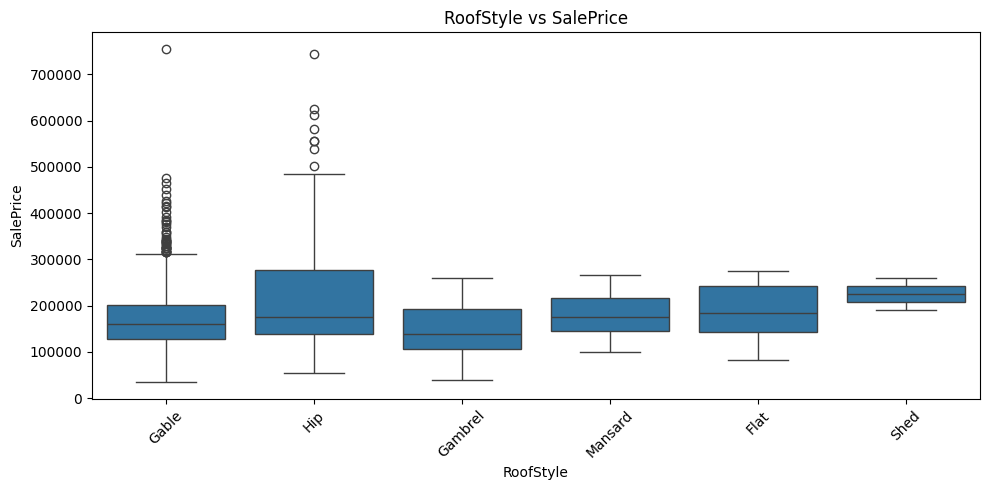

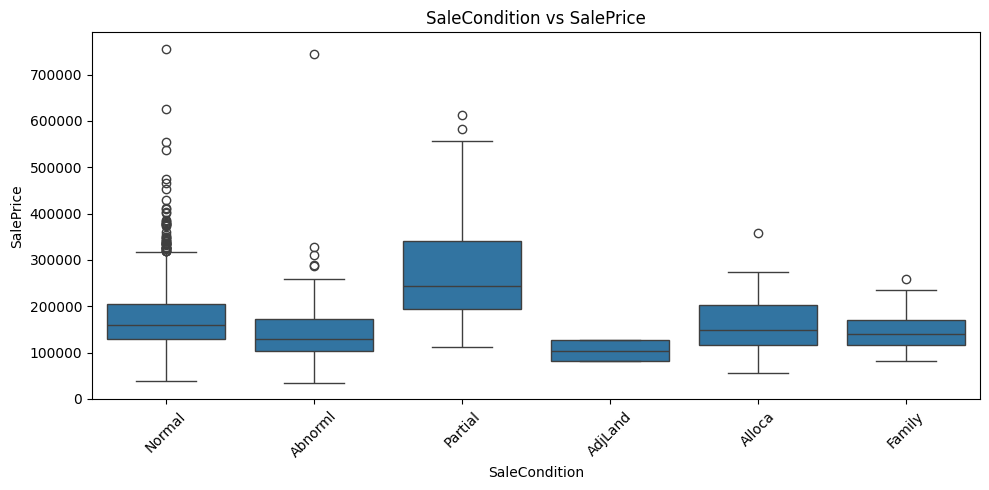

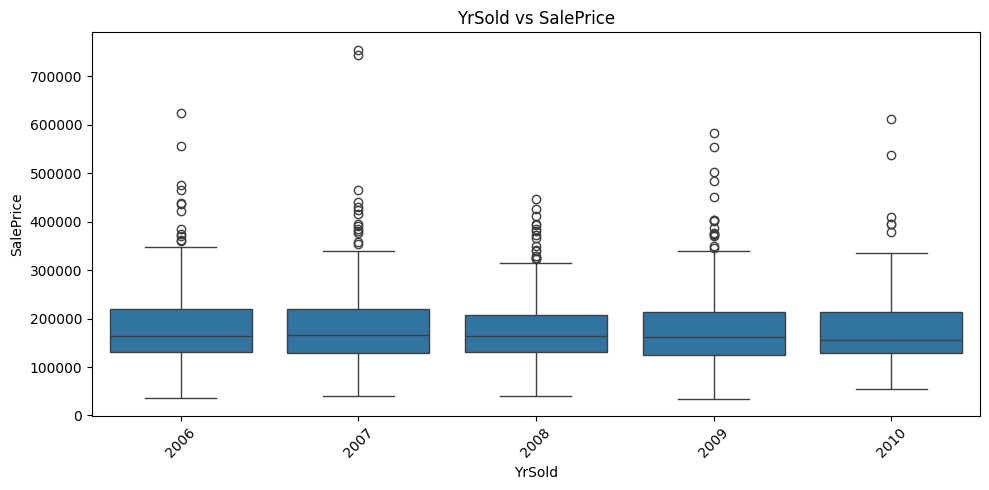

In [ ]:
for col in features:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=train_X, x=col, y="SalePrice")
    plt.title(f"{col} vs SalePrice")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 1. Xử lí cột BsmtFinType1

In [8]:
# train_data['BsmtFinType1'].value_counts()
col_BsmtFinType1 = {
    'Unf': 1,
    'GLQ': 2,
    'ALQ': 3,
    'BLQ': 3,
    'Rec': 3,
    'LwQ': 3
}
train_X['BsmtFinType1'] = train_X['BsmtFinType1'].map(col_BsmtFinType1)
train_X['BsmtFinType1'] = train_X['BsmtFinType1'].fillna(4)

train_X[['BsmtFinType1']].head(10)
# train_data['BsmtFinType1'].isnull().sum()


C:\Users\pc\AppData\Local\Temp\ipykernel_16552\228720391.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['BsmtFinType1'] = train_X['BsmtFinType1'].map(col_BsmtFinType1)
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\228720391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['BsmtFinType1'] = train_X['BsmtFinType1'].fillna(4)


,BsmtFinType1
0,2.0
1,3.0
2,2.0
3,3.0
4,2.0
5,2.0
6,2.0
7,3.0
8,1.0
9,2.0


## 2. Xử lí cột BsmtExposure

In [9]:
train_X['BsmtExposure'].value_counts()

col_BsmtExposure = {'No': 1, 'Av': 2,'Mn': 2, 'Gd': 3}

train_X['BsmtExposure'] = train_X['BsmtExposure'].map(col_BsmtExposure)
train_X['BsmtExposure'] = train_X['BsmtExposure'].fillna(4)

train_X[['BsmtExposure']]

C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1496429780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['BsmtExposure'] = train_X['BsmtExposure'].map(col_BsmtExposure)
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1496429780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['BsmtExposure'] = train_X['BsmtExposure'].fillna(4)


,BsmtExposure
0,1.0
1,3.0
2,2.0
3,1.0
4,2.0
...,...
1455,1.0
1456,1.0
1457,1.0
1458,2.0


In [10]:
test_X['BsmtFinType1'] = test_X['BsmtFinType1'].map(col_BsmtFinType1)
test_X['BsmtFinType1'] = test_X['BsmtFinType1'].fillna(4)

test_X[['BsmtFinType1']].head(10)


col_BsmtExposure = {'No': 1, 'Av': 2,'Mn': 2, 'Gd': 3}

test_X['BsmtExposure'] = test_X['BsmtExposure'].map(col_BsmtExposure)
test_X['BsmtExposure'] = test_X['BsmtExposure'].fillna(4)

test_X[['BsmtExposure']]


C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1853466353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['BsmtFinType1'] = test_X['BsmtFinType1'].map(col_BsmtFinType1)
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1853466353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['BsmtFinType1'] = test_X['BsmtFinType1'].fillna(4)
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1853466353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,BsmtExposure
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1454,1.0
1455,1.0
1456,1.0
1457,2.0


## 3. xử lí cột BsmtQual

In [11]:
train_data['BsmtQual'].value_counts()

col_BsmtQual = {
    'TA':1,
    'Fa': 1,
    'Gd': 2,
    'Ex':3
}

train_X['BsmtQual'] = train_X['BsmtQual'].map(col_BsmtQual)
train_X['BsmtQual'] = train_X['BsmtQual'].fillna(train_X['BsmtQual'].mode().iloc[0])

test_X['BsmtQual'] = test_X['BsmtQual'].map(col_BsmtQual)
test_X['BsmtQual'] = test_X['BsmtQual'].fillna(test_X['BsmtQual'].mode().iloc[0])

train_X[['BsmtQual']]

C:\Users\pc\AppData\Local\Temp\ipykernel_16552\2747340369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['BsmtQual'] = train_X['BsmtQual'].map(col_BsmtQual)
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\2747340369.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['BsmtQual'] = train_X['BsmtQual'].fillna(train_X['BsmtQual'].mode().iloc[0])
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\2747340369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,BsmtQual
0,2.0
1,2.0
2,2.0
3,1.0
4,2.0
...,...
1455,2.0
1456,2.0
1457,1.0
1458,1.0


## 4. xử lí cột Exterior1st

In [12]:
train_X['Exterior1st'].value_counts()


train_X['Exterior1st'] = train_X['Exterior1st'].apply(lambda x: x if x in ['VinylSd','MetalSd','Wd Sdng','HdBoard','Plywood','Stucco'] else 'others')
test_X['Exterior1st'] = test_X['Exterior1st'].apply(lambda x: x if x in ['VinylSd','MetalSd','Wd Sdng','HdBoard','Plywood','Stucco'] else 'others')
col_Exterior1st = {
    'VinylSd': 1,
    'MetalSd':2,
    'Wd Sdng':2,
    'HdBoard':2,
    'Plywood':2,
    'Stucco':2,
    'others':3
}
train_X['Exterior1st'] = train_X['Exterior1st'].map(col_Exterior1st)
test_X['Exterior1st'] = test_X['Exterior1st'].map(col_Exterior1st)
test_X['Exterior1st'] = test_X['Exterior1st'].fillna(test_X['Exterior1st'].mode().iloc[0])

train_X[['Exterior1st']]






C:\Users\pc\AppData\Local\Temp\ipykernel_16552\2543699056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['Exterior1st'] = train_X['Exterior1st'].apply(lambda x: x if x in ['VinylSd','MetalSd','Wd Sdng','HdBoard','Plywood','Stucco'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\2543699056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Exterior1st'] = test_X['Exterior1st'].apply(lambda x: x if x in ['VinylSd','MetalSd','Wd Sdng','HdBoard','Plywood','Stucco'] else 'oth

,Exterior1st
0,1
1,2
2,1
3,2
4,1
...,...
1455,1
1456,2
1457,3
1458,2


## 5. xử lí cột Exterior2nd

In [13]:
train_X['Exterior2nd'].value_counts()

train_X['Exterior2nd'] = train_X['Exterior2nd'].apply(lambda x: x if x in ['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood'] else 'others')
test_X['Exterior2nd'] = test_X['Exterior2nd'].apply(lambda x: x if x in ['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood'] else 'others')

col_Exterior2nd = {
   'VinylSd':1,
    'MetalSd':2,
    'HdBoard':3,
    'Wd Sdng':4,
    'Plywood':5,
    'others':6
}

train_X['Exterior2nd'] = train_X['Exterior2nd'].map(col_Exterior2nd)
test_X['Exterior2nd'] = test_X['Exterior2nd'].map(col_Exterior2nd)

train_X[['Exterior2nd']]



C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3884767856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['Exterior2nd'] = train_X['Exterior2nd'].apply(lambda x: x if x in ['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3884767856.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Exterior2nd'] = test_X['Exterior2nd'].apply(lambda x: x if x in ['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood'] else 'others')
C:\Users\pc\

,Exterior2nd
0,1
1,2
2,1
3,6
4,1
...,...
1455,1
1456,5
1457,6
1458,2


## 6. xử lí cột ExterQual

In [14]:
train_X['ExterQual'].value_counts()

train_X['ExterQual'] = train_X['ExterQual'].apply(lambda x: x if x in ['TA','Gd'] else 'others')
test_X['ExterQual'] = test_X['ExterQual'].apply(lambda x: x if x in ['TA','Gd'] else 'others')

col_ExterQual = {
    'TA':1,
    'Gd':2,
    'others':3
}

train_X['ExterQual'] = train_X['ExterQual'].map(col_ExterQual)
test_X['ExterQual'] = test_X['ExterQual'].map(col_ExterQual)

train_X[['ExterQual']]


C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1273555480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['ExterQual'] = train_X['ExterQual'].apply(lambda x: x if x in ['TA','Gd'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1273555480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['ExterQual'] = test_X['ExterQual'].apply(lambda x: x if x in ['TA','Gd'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1273555480.py:12: SettingWithCopyWarning: 
A value is

,ExterQual
0,2
1,1
2,2
3,1
4,2
...,...
1455,1
1456,1
1457,3
1458,1


## 7. Xử lí cột Foundation

In [15]:
train_X['Foundation'].value_counts()

train_X['Foundation'] = train_X['Foundation'].apply(lambda x: x if x in ['PConc','CBlock','BrkTil'] else 'others')
test_X['Foundation'] = test_X['Foundation'].apply(lambda x: x if x in ['PConc','CBlock','BrkTil'] else 'others')

col_Foundation = {
    'PConc': 1,
    'CBlock':2,
    'BrkTil':3,
    'others':4
}
train_X['Foundation'] = train_X['Foundation'].map(col_Foundation)
test_X['Foundation'] = test_X['Foundation'].map(col_Foundation)

train_X[['Foundation']]




C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3121643366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['Foundation'] = train_X['Foundation'].apply(lambda x: x if x in ['PConc','CBlock','BrkTil'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3121643366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Foundation'] = test_X['Foundation'].apply(lambda x: x if x in ['PConc','CBlock','BrkTil'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3121643366.py:12:

,Foundation
0,1
1,2
2,1
3,3
4,1
...,...
1455,1
1456,2
1457,4
1458,2


## 8. xử lý cột GarageFinish

In [16]:
train_X['GarageFinish'].value_counts()

train_X['GarageFinish'] = train_X['GarageFinish'].fillna('others')
test_X['GarageFinish'] = test_X['GarageFinish'].fillna('others')

col_GarageFinish = {
    'Unf':1,
    'RFn':2,
    'Fin':3,
    'others':4
}
train_X['GarageFinish'] = train_X['GarageFinish'].map(col_GarageFinish)
test_X['GarageFinish'] = test_X['GarageFinish'].map(col_GarageFinish)

train_X[['GarageFinish']]


C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3249563944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['GarageFinish'] = train_X['GarageFinish'].fillna('others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3249563944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['GarageFinish'] = test_X['GarageFinish'].fillna('others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3249563944.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,GarageFinish
0,2
1,2
2,2
3,1
4,2
...,...
1455,2
1456,1
1457,2
1458,1


## 9. xử lí cột GarageType

In [17]:
train_X['GarageType'].value_counts()

train_X['GarageType'] = train_X['GarageType'].apply(lambda x: x if x in ['Attchd','Detchd'] else 'others')
test_X['GarageType'] = test_X['GarageType'].apply(lambda x: x if x in ['Attchd','Detchd'] else 'others')

col_GarageType = {
    'Attchd': 1,
    'Detchd': 2,
    'others': 3
}
train_X['GarageType'] = train_X['GarageType'].map(col_GarageType)
test_X['GarageType'] = test_X['GarageType'].map(col_GarageType)

train_X[['GarageType']]


C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3227786418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['GarageType'] = train_X['GarageType'].apply(lambda x: x if x in ['Attchd','Detchd'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3227786418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['GarageType'] = test_X['GarageType'].apply(lambda x: x if x in ['Attchd','Detchd'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\3227786418.py:11: SettingWithCopy

,GarageType
0,1
1,1
2,1
3,2
4,1
...,...
1455,1
1456,1
1457,1
1458,1


## 10. xử lí cột HeatingQC

In [18]:
train_X['HeatingQC'].value_counts()

train_X['HeatingQC'] = train_X['HeatingQC'].apply(lambda x: x if x in ['Ex','TA','Gd'] else 'others')
test_X['HeatingQC'] = test_X['HeatingQC'].apply(lambda x: x if x in ['Ex','TA','Gd'] else 'others')

col_HeatingQC = {
    'Ex': 1,
    'TA': 2,
    'Gd': 3,
    'others': 4
}
train_X['HeatingQC'] = train_X['HeatingQC'].map(col_HeatingQC)
test_X['HeatingQC'] = test_X['HeatingQC'].map(col_HeatingQC)

train_X[['HeatingQC']]


C:\Users\pc\AppData\Local\Temp\ipykernel_16552\2199911239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['HeatingQC'] = train_X['HeatingQC'].apply(lambda x: x if x in ['Ex','TA','Gd'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\2199911239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['HeatingQC'] = test_X['HeatingQC'].apply(lambda x: x if x in ['Ex','TA','Gd'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\2199911239.py:12: SettingWithCopyWarning: 


,HeatingQC
0,1
1,1
2,1
3,3
4,1
...,...
1455,1
1456,2
1457,1
1458,3


## 11. Xử lí cột HouseStyle

In [19]:
train_X['HouseStyle'].value_counts()

train_X['HouseStyle'] = train_X['HouseStyle'].apply(lambda x: x if x in ['1Story','2Story','1.5Fin'] else 'others')
test_X['HouseStyle'] = test_X['HouseStyle'].apply(lambda x: x if x in ['1Story','2Story','1.5Fin'] else 'others')

col_HouseStyle = {
    '1Story': 1,
    '2Story': 2,
    '1.5Fin': 3,
    'others': 4
}
train_X['HouseStyle'] = train_X['HouseStyle'].map(col_HouseStyle)
test_X['HouseStyle'] = test_X['HouseStyle'].map(col_HouseStyle)

train_X[['HouseStyle']]


C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1060414757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['HouseStyle'] = train_X['HouseStyle'].apply(lambda x: x if x in ['1Story','2Story','1.5Fin'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1060414757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['HouseStyle'] = test_X['HouseStyle'].apply(lambda x: x if x in ['1Story','2Story','1.5Fin'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1060414757.py:1

,HouseStyle
0,2
1,1
2,2
3,2
4,2
...,...
1455,2
1456,1
1457,2
1458,1


## 12. xử lí cột KitchenQual

In [20]:
train_X['KitchenQual'].value_counts()

train_X['KitchenQual'] = train_X['KitchenQual'].apply(lambda x: x if x in ['TA','Gd','Ex'] else 'others')
test_X['KitchenQual'] = test_X['KitchenQual'].apply(lambda x: x if x in ['TA','Gd','Ex'] else 'others')

col_KitchenQual = {
    'TA': 1,
    'Gd': 2,
    'Ex': 3,
    'others': 4
}
train_X['KitchenQual'] = train_X['KitchenQual'].map(col_KitchenQual)
test_X['KitchenQual'] = test_X['KitchenQual'].map(col_KitchenQual)

train_X[['KitchenQual']]


C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1678469832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['KitchenQual'] = train_X['KitchenQual'].apply(lambda x: x if x in ['TA','Gd','Ex'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1678469832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['KitchenQual'] = test_X['KitchenQual'].apply(lambda x: x if x in ['TA','Gd','Ex'] else 'others')
C:\Users\pc\AppData\Local\Temp\ipykernel_16552\1678469832.py:12: SettingWithCopyWa

,KitchenQual
0,2
1,1
2,2
3,2
4,2
...,...
1455,1
1456,1
1457,2
1458,2


## 13. xử lí cột LandSlope

In [22]:

train_X = train_X.drop(columns=['LandSlope'])
test_X = test_X.drop(columns=['LandSlope'])


### - dữ liệu mất cân bằng 
### ---> tạm thời bỏ qua

## 14. Xử lí cột LotConfig

In [23]:
train_X['LotConfig'].value_counts()

train_X['LotConfig'] = train_X['LotConfig'].apply(lambda x: x if x in ['Inside','Corner'] else 'others')
test_X['LotConfig'] = test_X['LotConfig'].apply(lambda x: x if x in ['Inside','Corner'] else 'others')

col_LotConfig = {
    'Inside': 1,
    'Corner': 2,
    'others': 3
}

train_X['LotConfig'] = train_X['LotConfig'].map(col_LotConfig)
test_X['LotConfig'] = test_X['LotConfig'].map(col_LotConfig)

train_X[['LotConfig']]

,LotConfig
0,1
1,3
2,1
3,2
4,3
...,...
1455,1
1456,1
1457,1
1458,1


## 15. Xử lí cột LotShape

In [24]:
train_X['LotShape'].value_counts()


train_X['LotShape'] = train_X['LotShape'].apply(lambda x: x if x in ['Reg','IR1'] else 'others')
test_X['LotShape'] = test_X['LotShape'].apply(lambda x: x if x in ['Reg','IR1'] else 'others')

col_LotShape = {
    'Reg':1,
    'IR1':2,
    'others':3
}
train_X['LotShape'] = train_X['LotShape'].map(col_LotShape)
test_X['LotShape'] = test_X['LotShape'].map(col_LotShape)

train_X[['LotShape']]


,LotShape
0,1
1,1
2,2
3,2
4,2
...,...
1455,1
1456,1
1457,1
1458,1


## 16. xử lí cột MSZoning

In [ ]:
train_X['MSZoning'].value_counts()

train_X['MSZoning'] = train_X['MSZoning'].apply(lambda x: x if x in ['RL','RM'] else 'others')
test_X['MSZoning'] = test_X['MSZoning'].apply(lambda x: x if x in ['RL','RM'] else 'others')

col_MSZoning = {
    'RL': 1,
    'RM': 2,
    'others': 3
}

train_X['MSZoning'] = train_X['MSZoning'].map(col_MSZoning)
test_X['MSZoning'] = test_X['MSZoning'].map(col_MSZoning)

train_X[['MSZoning']]

,MSZoning
0,1
1,1
2,1
3,1
4,1
...,...
1455,1
1456,1
1457,1
1458,1


## 17.Xử lí cột Neighborhood

In [26]:
from category_encoders import TargetEncoder

train_X['Neighborhood'].value_counts()

low_freq = train_X['Neighborhood'].value_counts()[train_X['Neighborhood'].value_counts() < 20].index
train_X['Neighborhood'] = train_X['Neighborhood'].replace(low_freq, 'Other')

low_freq1 = test_X['Neighborhood'].value_counts()[test_X['Neighborhood'].value_counts() < 20].index
test_X['Neighborhood'] = test_X['Neighborhood'].replace(low_freq1, 'Other')

te = TargetEncoder(cols=['Neighborhood'])
train_X['Neighborhood'] = te.fit_transform(train_X['Neighborhood'], train_X['SalePrice'])

test_X['Neighborhood'] = te.transform(test_X['Neighborhood'])


In [28]:
from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler()

train_X['Neighborhood'] = scaler3.fit_transform(train_X[['Neighborhood']])
test_X['Neighborhood'] = scaler3.transform(test_X[['Neighborhood']])

train_X[['Neighborhood']]

,Neighborhood
0,0.339152
1,-0.540851
2,0.339152
3,0.551489
4,2.587585
...,...
1455,0.243163
1456,0.172023
1457,0.551489
1458,-0.633438


## 18. Xử lí cột RoofStyle

In [29]:
train_X['RoofStyle'].value_counts()

train_X['RoofStyle'] = train_X['RoofStyle'].apply(lambda x: x if x in ['Gable','Hip'] else 'others')
test_X['RoofStyle'] = test_X['RoofStyle'].apply(lambda x: x if x in ['Gable','Hip'] else 'others')

col_RoofStyle = {
    'Gable':1,
    'Hip': 2,
    'others':3
}

train_X['RoofStyle'] = train_X['RoofStyle'].map(col_RoofStyle)
test_X['RoofStyle'] = test_X['RoofStyle'].map(col_RoofStyle)

train_X[['RoofStyle']]


,RoofStyle
0,1
1,1
2,1
3,1
4,1
...,...
1455,1
1456,1
1457,1
1458,2


## 19. Xử lí cột SaleCondition

In [30]:
train_X['SaleCondition'].value_counts()

train_X['SaleCondition'] = train_X['SaleCondition'].apply(lambda x: x if x in['Normal','Partial','Abnorml'] else 'others')
test_X['SaleCondition'] = test_X['SaleCondition'].apply(lambda x: x if x in['Normal','Partial','Abnorml'] else 'others')

col_SaleCondition = {
    'Normal': 1,
    'Partial': 2,
    'Abnorml':3,
    'others': 4

}

train_X['SaleCondition'] = train_X['SaleCondition'].map(col_SaleCondition)
test_X['SaleCondition'] = test_X['SaleCondition'].map(col_SaleCondition)

train_X[['SaleCondition']]

,SaleCondition
0,1
1,1
2,1
3,3
4,1
...,...
1455,1
1456,1
1457,1
1458,1


## 20. Xử lí cột OverallQual

In [31]:
train_X['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

## 21. Xử lí cột YearBuilt và YrSold

In [32]:
# train_data['YearBuilt'].value_counts()
from sklearn.preprocessing import StandardScaler
train_X['HouseAge'] = train_X['YrSold'] - train_X['YearBuilt']
test_X['HouseAge'] = test_X['YrSold'] - test_X['YearBuilt']
scaler = StandardScaler()

train_X['HouseAge'] = scaler.fit_transform(train_X[['HouseAge']])
test_X['HouseAge'] = scaler.transform(test_X[['HouseAge']])

train_X[['HouseAge']]

,HouseAge
0,-1.043259
1,-0.183465
2,-0.977121
3,1.800676
4,-0.944052
...,...
1455,-0.944052
1456,-0.150396
1457,1.073157
1458,0.775536


## 22. xử lí cột YearRemodAdd

In [33]:
train_X['YearRemodAdd'].value_counts()

train_X['IsRemodeled'] = (train_X['YearRemodAdd'] != train_X['YearBuilt']).astype(int)
test_X['IsRemodeled']  = (test_X['YearRemodAdd'] != test_X['YearBuilt']).astype(int)

train_X['IsRemodeled']

0       0
1       0
2       1
3       1
4       0
       ..
1455    1
1456    1
1457    1
1458    1
1459    0
Name: IsRemodeled, Length: 1460, dtype: int64

## 23. Xử lí cột TotalBsmtSF

In [34]:
train_X['TotalBsmtSF']

train_X['TotalBsmtSF'] = scaler.fit_transform(train_X[['TotalBsmtSF']])
test_X['TotalBsmtSF'] = scaler.transform(test_X[['TotalBsmtSF']])

train_X[['TotalBsmtSF']]



,TotalBsmtSF
0,-0.459303
1,0.466465
2,-0.313369
3,-0.687324
4,0.199680
...,...
1455,-0.238122
1456,1.104925
1457,0.215641
1458,0.046905


## 24. Xử lí cột 1stFlrSF

In [35]:
train_X['1stFlrSF'] = scaler.fit_transform(train_X[['1stFlrSF']])
test_X['1stFlrSF'] = scaler.transform(test_X[['1stFlrSF']])

train_X[['1stFlrSF']]

,1stFlrSF
0,-0.793434
1,0.257140
2,-0.627826
3,-0.521734
4,-0.045611
...,...
1455,-0.542435
1456,2.355701
1457,0.065656
1458,-0.218982


## 25. Xử lí cột GrLivArea

In [36]:
test_X['GrLivArea'].value_counts()

train_X['GrLivArea'] = scaler.fit_transform(train_X[['GrLivArea']])
test_X['GrLivArea'] = scaler.transform(test_X[['GrLivArea']])

train_X[['GrLivArea']]

,GrLivArea
0,0.370333
1,-0.482512
2,0.515013
3,0.383659
4,1.299326
...,...
1455,0.250402
1456,1.061367
1457,1.569647
1458,-0.832788


## 26. Xử lí cột FullBath

In [37]:
train_X['FullBath'].value_counts()

train_X['Has3FullBath'] = (train_X['FullBath'] >= 3).astype(int)
test_X['Has3FullBath']  = (test_X['FullBath'] >= 3).astype(int)

## 27. xử lí cột TotRmsAbvGrd

In [38]:


bins = [0,4,7,100]
labels = ['small','medium','large']
train_X['TotRms_group'] = pd.cut(train_X['TotRmsAbvGrd'], bins=bins, labels=labels)
test_X['TotRms_group'] = pd.cut(test_X['TotRmsAbvGrd'], bins=bins, labels=labels)

train_X  = pd.get_dummies(train_X,columns=['TotRms_group'], drop_first= True)
test_X  = pd.get_dummies(test_X,columns=['TotRms_group'], drop_first= True)
dummy_cols = [c for c in train_X.columns if 'TotRms_group' in c]
train_X[dummy_cols] = train_X[dummy_cols].astype(int)
test_X[dummy_cols]  = test_X[dummy_cols].astype(int)

## 28. Xửi lí côt GarageCars

In [39]:
train_X['GarageCars'].value_counts()

train_X['has3Garage'] = (train_X['GarageCars']==3).astype(int)

test_X['has3Garage'] = (test_X['GarageCars']==3).astype(int)

## 29. Xử lí cột GarageArea

In [41]:
train_X['GarageArea'].value_counts()

train_X['GarageArea_per_car'] = (train_X['GarageArea']/train_X['GarageCars']) + 1
test_X['GarageArea_per_car'] = (test_X['GarageArea']/test_X['GarageCars']) + 1

numeric_cols = ['GarageArea', 'GarageArea_per_car']  # thêm các numeric cột khác

scaler1 = StandardScaler()
train_X[numeric_cols] = scaler1.fit_transform(train_X[numeric_cols])
test_X[numeric_cols] = scaler1.transform(test_X[numeric_cols])


In [42]:
test_X['Neighborhood'].value_counts()

Neighborhood
-0.633438    218
-0.962189    126
 0.339152    117
 0.849602     96
-0.962054     94
 2.538426     89
 0.243163     86
-0.798691     77
-0.540851     76
 0.124145     66
-0.414941     65
 0.172023     58
-1.253786     56
 0.551489     52
-1.002661     50
 1.003161     34
 2.587585     30
 1.526228     26
-0.424147     23
 0.021083     20
Name: count, dtype: int64

## loại bỏ các cột không cần thiết trước khi huấn luyện

In [43]:
train_X = train_X.drop(columns=['YearBuilt','YrSold','YearRemodAdd','TotRmsAbvGrd'])
test_X = test_X.drop(columns=['YearBuilt','YrSold','YearRemodAdd','TotRmsAbvGrd'])

In [45]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# === MODELS ===
models = {
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42),
    "XGBRegressor": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method="hist"
    )
}

X = train_X
y = train_data['SalePrice']

# custom RMSE scorer (scikit give negative mse so convert)
rmse_scorer = make_scorer(lambda y_true,y_pred: np.sqrt(mean_squared_error(y_true,y_pred)), greater_is_better=False)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    rmse_scores = -cross_val_score(model, X, y, scoring=rmse_scorer, cv=kf)
    r2_scores   = cross_val_score(model, X, y, scoring='r2', cv=kf)

    print(f"\n===== {name} - 5Fold =====")
    print("RMSE mean:", rmse_scores.mean())
    print("RMSE std :", rmse_scores.std())
    print("R2 mean  :", r2_scores.mean())
    print("R2 std   :", r2_scores.std())



===== DecisionTree - 5Fold =====
RMSE mean: 4737.080989376268
RMSE std : 3593.6853997177827
R2 mean  : 0.9938263177371048
R2 std   : 0.009628776760139178

===== RandomForest - 5Fold =====
RMSE mean: 4047.347895681637
RMSE std : 1881.1961584886478
R2 mean  : 0.9970630958588316
R2 std   : 0.0020435456838839615

===== XGBRegressor - 5Fold =====
RMSE mean: 7608.280454169209
RMSE std : 1893.2648337479816
R2 mean  : 0.9897689938545227
R2 std   : 0.005559075118642957


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# ==== 1) Chuẩn bị dữ liệu ====
X = train_X.drop(columns=['SalePrice'])   # đã xử lý đầy đủ feature
y = np.log1p(train_data['SalePrice'])

# ==== 2) Train full model RandomForest ====
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X, y)

# ==== 3) Predict test_X ====
test_pred_log = rf.predict(test_X)
test_pred = np.expm1(test_pred_log) 

# ==== 4) Tạo DataFrame submission ====
# nếu đây là bài house prices Kaggle: cần có Id trong test
submission = pd.DataFrame({
    "Id": test_data["Id"],       # thay test_data bằng tên DF test gốc của bạn
    "SalePrice": test_pred
})

# ==== 5) Lưu file CSV ====
submission.to_csv("submission.csv", index=False)

print("✅ Done! File 'submission.csv' đã được tạo")


✅ Done! File 'submission1.csv' đã được tạo
